In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# import sys

## DATA INGESTION

In [2]:
data = pd.read_csv("TSLA.CSV")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


### Univariate Analysis

In [3]:
stock_data = data[['Date', 'Close']]

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [5]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

/tmp/ipykernel_95/3223796615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [7]:
stock_data = stock_data.set_index('Date')
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## EDA of DATA

In [8]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


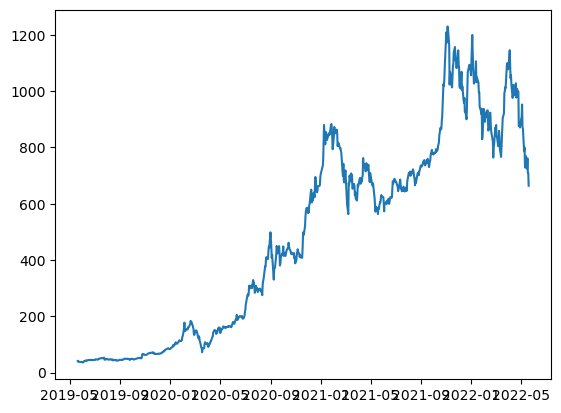

In [9]:
plt.plot(stock_data)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

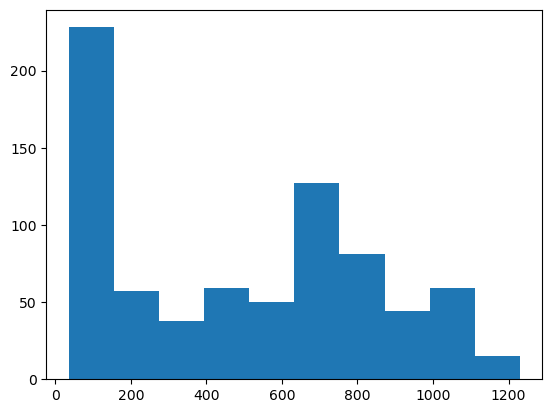

In [10]:
plt.hist(stock_data)

In [11]:
import seaborn as sns

/tmp/ipykernel_95/345850028.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data)


<AxesSubplot: ylabel='Density'>

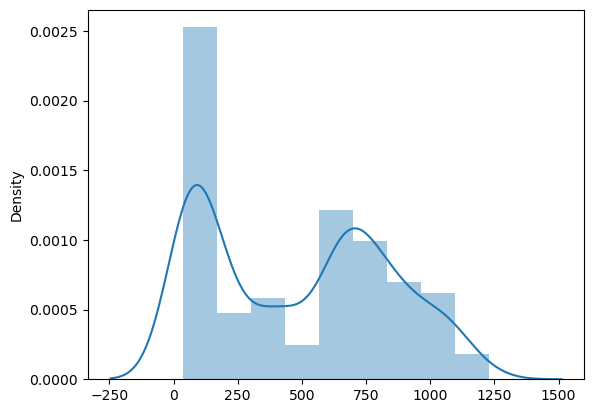

In [12]:
sns.distplot(stock_data)

In [13]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [14]:
rolmean = stock_data['Close'].rolling(12).mean()

In [15]:
rolstd = stock_data['Close'].rolling(12).std()

In [16]:
rolmean.head(2)

Date
2019-05-21   NaN
2019-05-22   NaN
Name: Close, dtype: float64

In [17]:
rolstd.head(2)

Date
2019-05-21   NaN
2019-05-22   NaN
Name: Close, dtype: float64

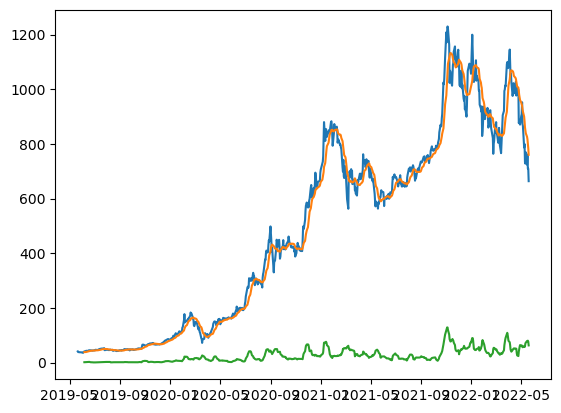

In [18]:
plt.plot(stock_data['Close'])
plt.plot(rolmean)
plt.plot(rolstd)

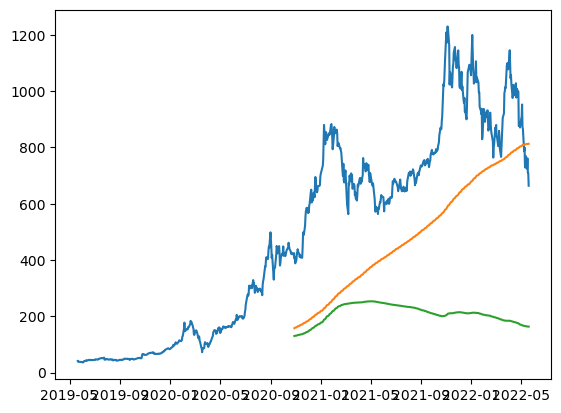

In [19]:
rolmean = stock_data['Close'].rolling(365).mean()
rolstd = stock_data['Close'].rolling(365).std()
plt.plot(stock_data['Close'])
plt.plot(rolmean)
plt.plot(rolstd)

## Calculate P Value

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adft = adfuller(stock_data)

In [22]:
p_value = adft[1]
p_value

0.5998762543050691

From the plot
Null Hypothesis : Data is non stationary

P_value <0.05 ----> Accept the Null Hypothesis

P_value >0.05 ----> Reject the Null Hypothesis

Hence we are rejecting Null Hypothesis

<AxesSubplot: >

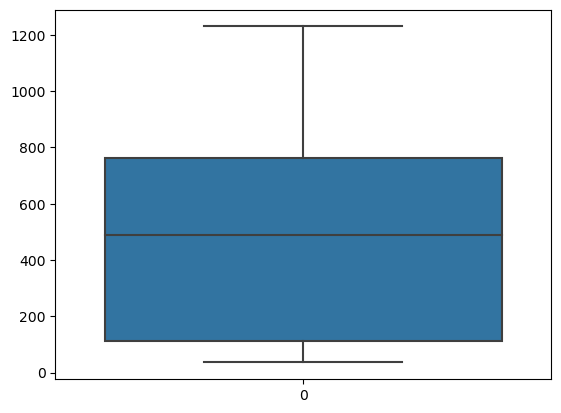

In [23]:
sns.boxplot(stock_data['Close'])

In [24]:
## No outliers in our data

## Time Series Decomposition

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'], period = 12)

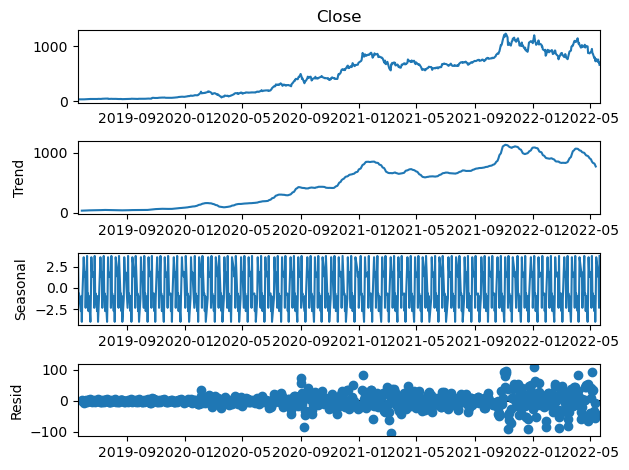

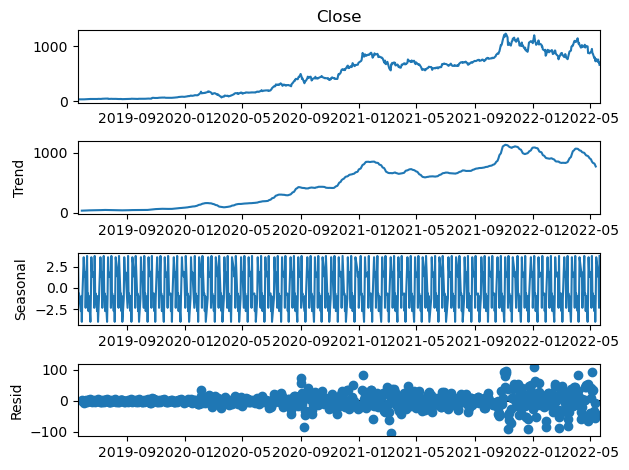

In [26]:
result.plot()

In [27]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

## ACF & PACF

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


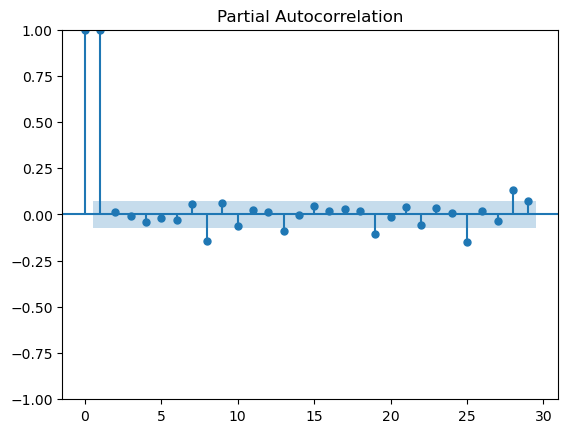

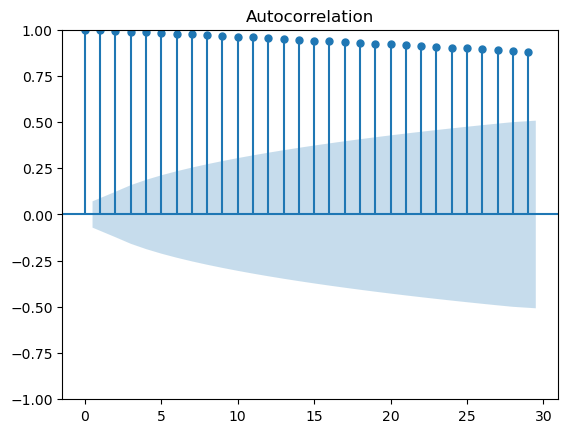

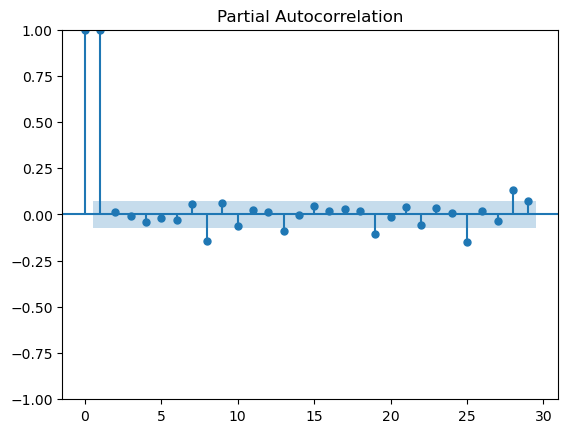

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data)
plot_pacf(stock_data)

# Preprocessing the Data

In [29]:
df_close = stock_data

In [30]:
df_close = df_close.diff()

In [31]:
df_close.head()

,Close
Date,
2019-05-21,NaN
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998


In [32]:
df_close = df_close.dropna()
df_close.head()

,Close
Date,
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998
2019-05-29,0.231998


In [33]:
adft = adfuller(df_close)
adft[1]

3.498786392123862e-13

In [34]:
## we can accept the null hypothesis now

In [35]:
train_data = df_close[0:-60]
test_data = df_close[-60:]

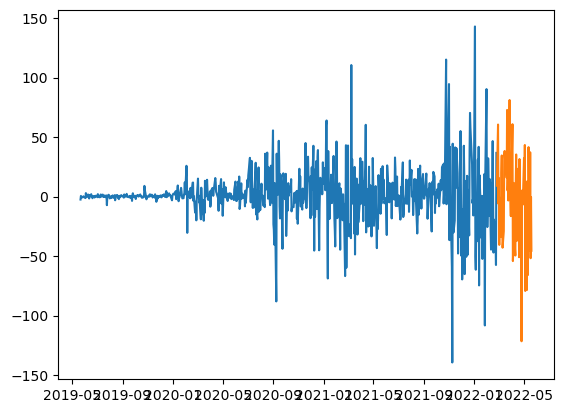

In [36]:
plt.plot(train_data)
plt.plot(test_data)

<AxesSubplot: ylabel='Density'>

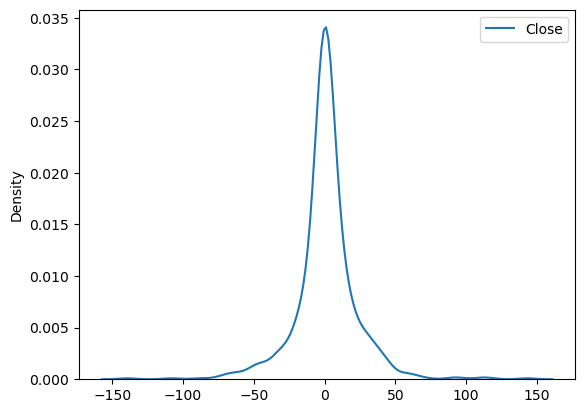

In [37]:
sns.kdeplot(train_data)

## Train Test Split

In [38]:
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]

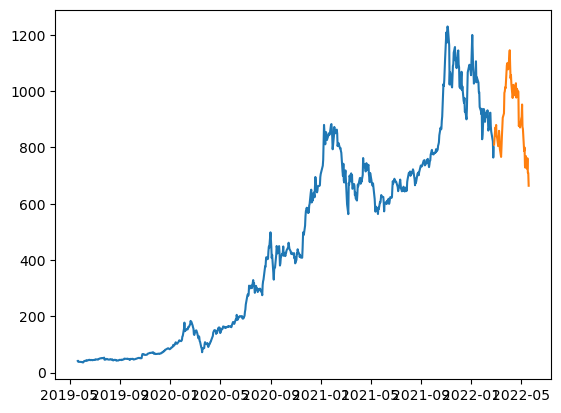

In [39]:
plt.plot(train_data)
plt.plot(test_data)

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [41]:
# Converting the Train Data into List

history = [x for x in train_data]

In [44]:
model = ARIMA(history, order = (1,1,1))

In [45]:
model = model.fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Thu, 04 Jan 2024   AIC                           6306.700
Time:                        17:50:12   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model.forecast()

array([800.20438321])

In [49]:
mean_squared_error([test_data[0]], model.forecast())

93.42405358558581

In [52]:
rmse = np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

In [53]:
rmse

9.665611909526774

In [69]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [70]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [71]:
import warnings
warnings.filterwarnings('ignore')

p_values= range(0,3)
d_values= range(0,3)
q_values= range(0,3)

evaluate_models(train_data, test_data, p_values, d_values, q_values)

Best Arima (0, 0, 0) RMSE 457.4144164149724
Best Arima (0, 0, 1) RMSE 241.16371929407057
Best Arima (0, 0, 2) RMSE 165.49133349278682
Best Arima (0, 1, 0) RMSE 39.51639749939755
Best Arima (0, 1, 1) RMSE 39.48249922478982
Best Arima (0, 1, 2) RMSE 39.61692064717197
Best Arima (0, 2, 0) RMSE 57.83467097428299
Best Arima (0, 2, 1) RMSE 39.61141493218516
Best Arima (0, 2, 2) RMSE 39.57983474058014
Best Arima (1, 0, 0) RMSE 39.47656498115289
Best Arima (1, 0, 1) RMSE 39.449364942739216
Best Arima (1, 0, 2) RMSE 39.58386477807871
Best Arima (1, 1, 0) RMSE 39.47529828050833
Best Arima (1, 1, 1) RMSE 39.55461332802471
Best Arima (1, 1, 2) RMSE 39.93457483546269
Best Arima (1, 2, 0) RMSE 46.184465166025205
Best Arima (1, 2, 1) RMSE 39.572721531123406
Best Arima (1, 2, 2) RMSE 39.73084213949439
Best Arima (2, 0, 0) RMSE 39.43995654201625
Best Arima (2, 0, 1) RMSE 39.49398455812983
Best Arima (2, 0, 2) RMSE 39.596218562673826
Best Arima (2, 1, 0) RMSE 39.634741557173925
Best Arima (2, 1, 1) RMSE

In [72]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.43992944070974


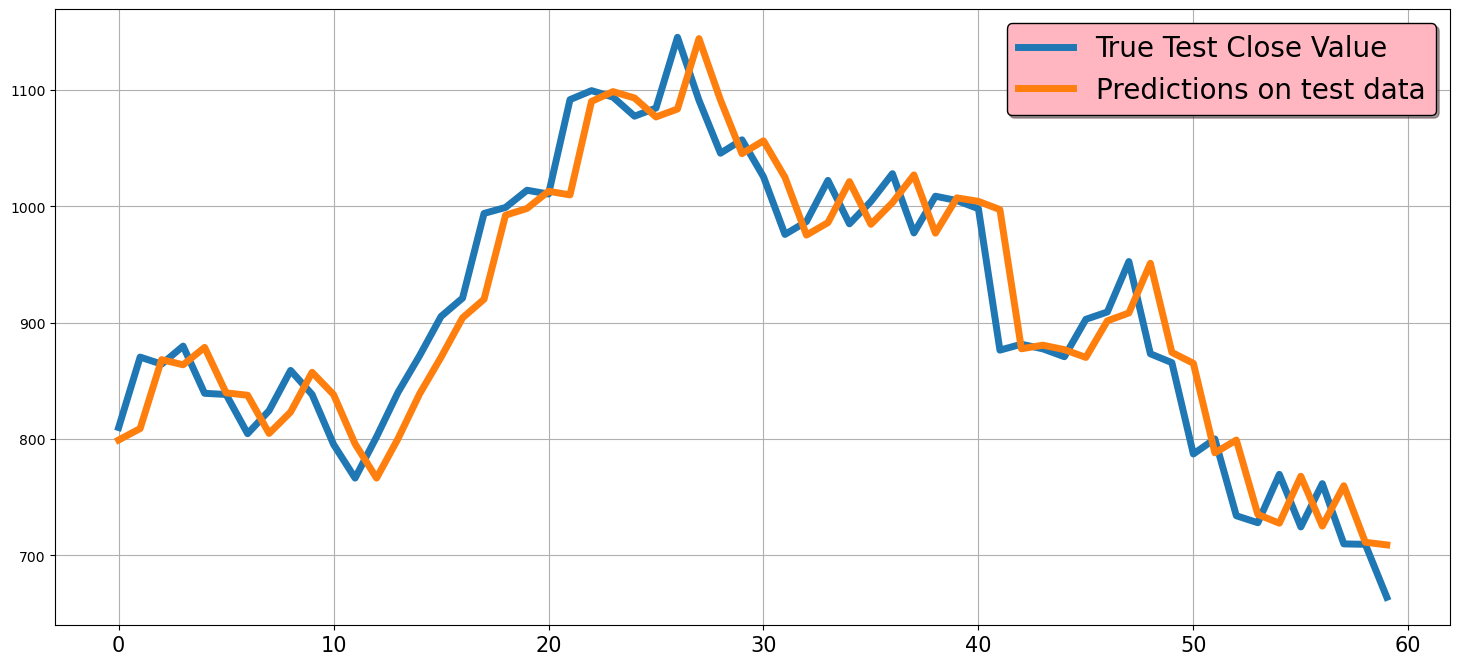

In [73]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [74]:
fc_series = pd.Series(predictions, index=test_data.index)

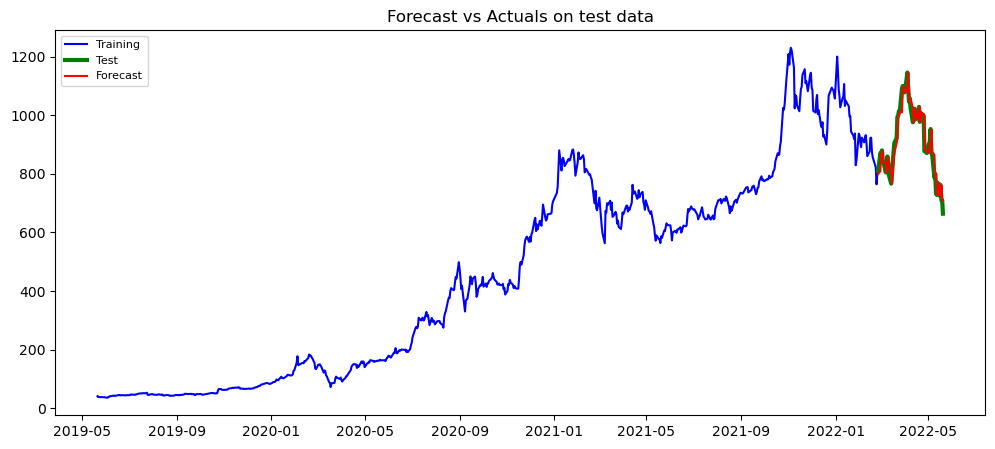

In [75]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

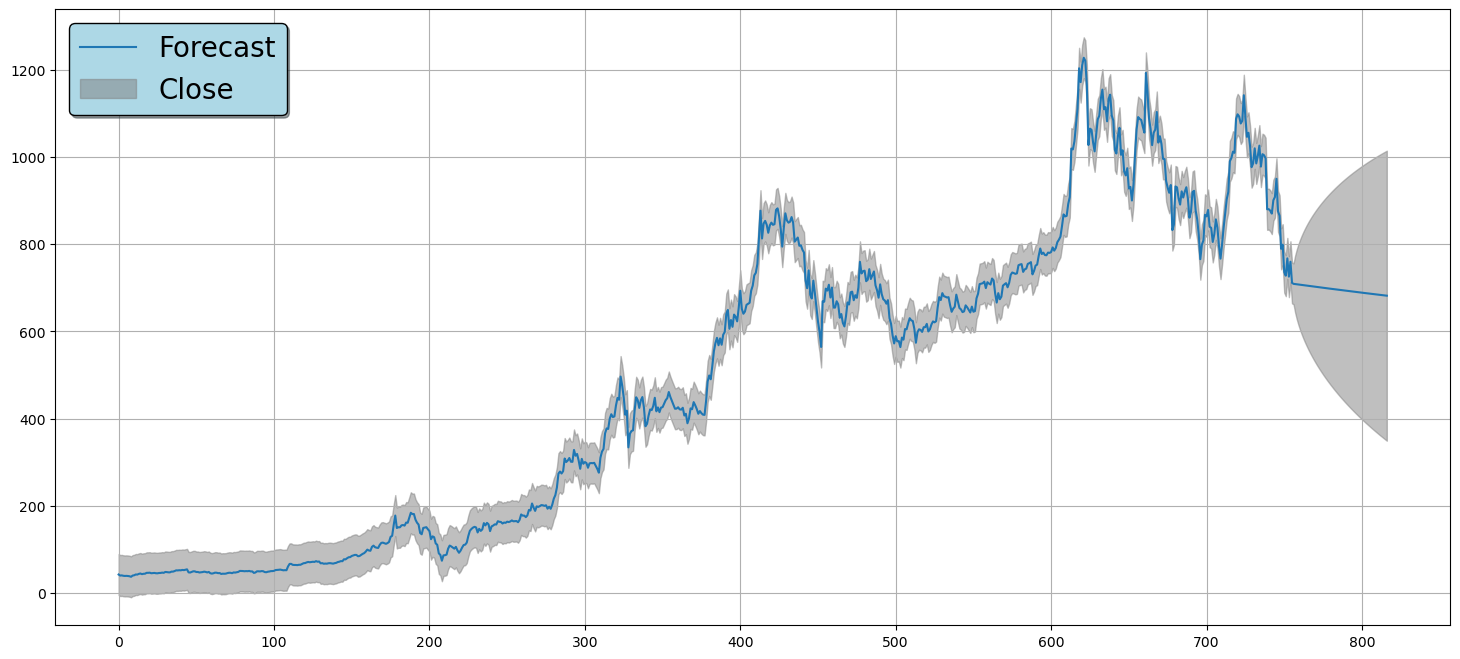

In [76]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')